In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score,confusion_matrix,precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#### 판다스로 csv파일 불러와 저장

In [3]:
diabetes_data=pd.read_csv('C:/Users/jangd/OneDrive/바탕 화면/python/ml/data_sets/diabetes.csv')

#### 결과값 개수 확인(당뇨병이 아닌 사람과 당뇨병인 사람)

In [4]:
print(diabetes_data['Outcome'].value_counts())


0    500
1    268
Name: Outcome, dtype: int64


In [5]:
diabetes_data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


#### 당뇨병 데이터 불러오면서 null값있나 확인

In [6]:
diabetes_data.info() 

# ? 
# * 피마 당뇨병 데이터에서 나와있는 데이터 null값 하나도 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### f1_score 모듈 불러오기

In [7]:
import sys 
sys.path.append('C:/Users/jangd/OneDrive/바탕 화면/python/ml/module')
import f1_score2 as f1
# f1 socre를 구하는 함수를 import해서 불러왔음


#### 결과값을 제외한 것 따로 저장(X만들기 위함)

In [8]:
X = diabetes_data.iloc[:,:-1] # 결과값을 제외한 나머지를 불러온 것을 알 수 있음
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


#### 결과 값을 저장(y를 따로 만들기 위함)

In [9]:
y = diabetes_data.iloc[:,-1] # 당뇨병의 결과 값만 빼온 것을 알 수 있음
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

#### 분리시켜주고 훈련까지

In [10]:


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2 , random_state=156, stratify= y)
#  stratify = y는 계층화를 의미합니다. 계층화는 train_test_split 함수가 나눠놓은 클래스 레이블 비율을 입력 데이터 셋과 동일하게 맞추는 과정입니다.
# 로지스틱 회귀로 학습,예측 및 평가 수행.

lr_clf =LogisticRegression() # lr_clf에 로지스틱 클래스불러오는 것 넣어주고
lr_clf.fit(X_train,y_train) # X_train,y_train으로 훈련시켜줌


C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### pred변수에 predict저장

In [11]:

pred= lr_clf.predict(X_test)  # predict함수는 새로운 변수에 대한 예측을 수행한 결과값
pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

#### predict_proba변수에 predict_proba함수 결과값 적용

In [12]:
pred_proba = lr_clf.predict_proba(X_test)[:,1] # 데이터에 대해서 결과값에 대해서 속할 확률
pred_proba


array([0.02178398, 0.20836361, 0.15493623, 0.49417532, 0.04522648,
       0.58832464, 0.74408035, 0.20383637, 0.15103405, 0.15559048,
       0.67826705, 0.49886764, 0.06556237, 0.41045029, 0.21079749,
       0.12145106, 0.75384612, 0.40657875, 0.03585548, 0.78508243,
       0.46236587, 0.3014981 , 0.06814385, 0.3397604 , 0.34348246,
       0.1116899 , 0.91769377, 0.65562202, 0.17035894, 0.81179706,
       0.20076845, 0.20551562, 0.13986472, 0.23133528, 0.15172468,
       0.70463697, 0.2789915 , 0.68439404, 0.80784332, 0.60810785,
       0.40815713, 0.33910113, 0.65039421, 0.25119371, 0.31265799,
       0.04204495, 0.76030573, 0.1303488 , 0.48978375, 0.29485061,
       0.34285501, 0.82621346, 0.84770159, 0.08553742, 0.15877919,
       0.31507555, 0.099921  , 0.36651615, 0.39402032, 0.40910807,
       0.22740223, 0.73447266, 0.36856705, 0.55664641, 0.23901302,
       0.10301589, 0.19942597, 0.71104245, 0.1651998 , 0.67849677,
       0.0848145 , 0.35794453, 0.14396107, 0.4623364 , 0.67450

In [13]:
f1.get_clf_eval(y_test,pred)

오차 행렬
[[88 12]
 [23 31]]
정확도: 0.7727, 정밀도: 0.7209, 재현율 :0.5741 ,F1 : 0.6392


In [14]:
from sklearn.metrics import roc_auc_score
# pred =  data.predict(X_test)
# roc_curve = roc_auc_score(y_test,pred)

roc_score= roc_auc_score(y_test,pred_proba)
print('ROC AUC 값:{0:.4f}'.format(roc_score))

ROC AUC 값:0.7919


In [15]:
import sys 
sys.path.append('C:/Users/jangd/OneDrive/바탕 화면/python/ml/module')
import AUC_ROC_graph as ar_graph


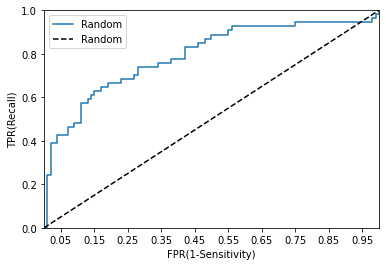

In [16]:
ar_graph.roc_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])

In [19]:
import sys 
sys.path.append('C:/Users/jangd/OneDrive/바탕 화면/python/ml/module')
import precision_recall_graph as pr

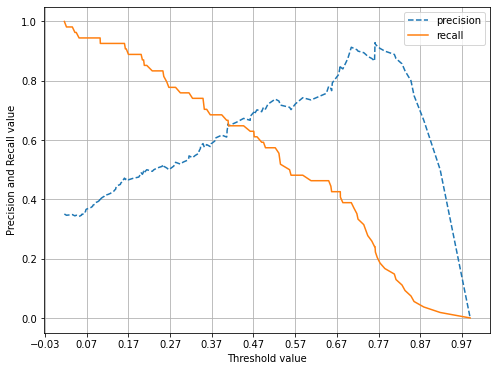

In [18]:
pr.precision_recall_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])